<a href="https://colab.research.google.com/github/huy20146177/baitapAI/blob/main/baitaptuan4_1_sangthu2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c07899246e612ad9a4d192c652dc7f7553aa8a4810f612f27f3db2665b821ab0
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


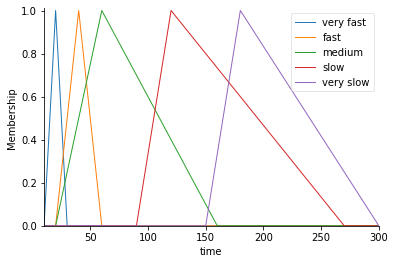

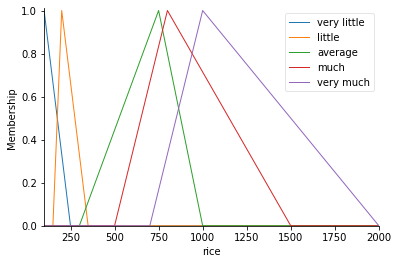

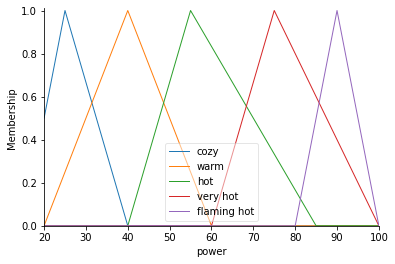

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,301,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
power = ctrl.Consequent(np.arange(20,101,1),'power')

time['very fast'] = fuzz.trimf(time.universe,[10,20,30])
time['fast'] = fuzz.trimf(time.universe,[20,40,60])
time['medium'] = fuzz.trimf(time.universe,[20,60,160])
time['slow'] = fuzz.trimf(time.universe,[90,120,270])
time['very slow'] = fuzz.trimf(time.universe,[150,180,300])


rice['very little'] = fuzz.trimf(rice.universe,[100,100,250])
rice['little'] = fuzz.trimf(rice.universe,[150,200,350])
rice['average'] = fuzz.trimf(rice.universe,[300,750,1000])
rice['much'] = fuzz.trimf(rice.universe,[500,800,1500])
rice['very much'] = fuzz.trimf(rice.universe,[700,1000,2000])

power['cozy'] = fuzz.trimf(power.universe,[15,25,40])
power['warm'] = fuzz.trimf(power.universe,[20,40,60])
power['hot'] = fuzz.trimf(power.universe,[40,55,85])
power['very hot'] = fuzz.trimf(power.universe,[60,75,100])
power['flaming hot'] = fuzz.trimf(power.universe,[80,90,100])
time.view()
rice.view()
power.view()

52.43335075797179


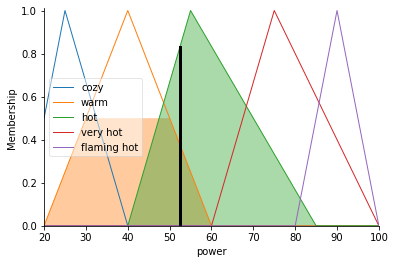

In [15]:
rule1 = ctrl.Rule(time['very fast']&rice['very little'],power['flaming hot'])
rule2 = ctrl.Rule(time['very fast']&rice['little'],power['flaming hot'])
rule3 = ctrl.Rule(time['very fast']&rice['average'],power['very hot'])
rule4 = ctrl.Rule(time['very fast']&rice['much'],power['very hot'])
rule5 = ctrl.Rule(time['very fast']&rice['very much'],power['hot'])

rule6 = ctrl.Rule(time['fast']&rice['very little'],power['very hot'])
rule7 = ctrl.Rule(time['fast']&rice['little'],power['very hot'])
rule8 = ctrl.Rule(time['fast']&rice['average'],power['hot'])
rule9 = ctrl.Rule(time['fast']&rice['much'],power['hot'])
rule10 = ctrl.Rule(time['fast']&rice['very much'],power['hot'])

rule11 = ctrl.Rule(time['medium']&rice['very little'],power['hot'])
rule12 = ctrl.Rule(time['medium']&rice['little'],power['hot'])
rule13 = ctrl.Rule(time['medium']&rice['average'],power['warm'])
rule14 = ctrl.Rule(time['medium']&rice['much'],power['warm'])
rule15 = ctrl.Rule(time['medium']&rice['very much'],power['warm'])

rule16 = ctrl.Rule(time['slow']&rice['very little'],power['warm'])
rule17 = ctrl.Rule(time['slow']&rice['little'],power['warm'])
rule18 = ctrl.Rule(time['slow']&rice['average'],power['warm'])
rule19 = ctrl.Rule(time['slow']&rice['much'],power['warm'])
rule20 = ctrl.Rule(time['slow']&rice['very much'],power['warm'])

rule21 = ctrl.Rule(time['very slow']&rice['very little'],power['cozy'])
rule22 = ctrl.Rule(time['very slow']&rice['little'],power['cozy'])
rule23 = ctrl.Rule(time['very slow']&rice['average'],power['cozy'])
rule24 = ctrl.Rule(time['very slow']&rice['much'],power['cozy'])
rule25 = ctrl.Rule(time['very slow']&rice['very much'],power['cozy'])
tipping_ctrl = ctrl.ControlSystem([rule1 ,rule2 ,rule3 ,rule4 ,rule5 ,rule6 ,rule7 ,rule8 ,rule9 ,rule10 ,rule11 ,rule12 ,rule13 ,rule14 ,rule15 ,rule16 ,rule17 ,rule18 ,rule19 ,rule20 ,rule21 ,rule22 ,rule23 ,rule24 ,rule25 ])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time'] = 40      #10-300 min
tipping.input['rice'] = 1000      #100 - 2000 g
tipping.compute()
print(tipping.output['power'])
power.view(sim = tipping)

ValueError: ignored